In [353]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [354]:
df = pd.read_csv('LaptopPrices.csv')

In [355]:
df.head()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
0,0,"Lenovo IdeaPad D330 10IGL Celeron N4020 10.1"" ...","Intel Celeron N4020 (4M Cache,1.10 GHz up to 2...",4GB DDR4,128GB eMMC SSD,"10.1"" (1280 x 800) HD Touchscreen","34,500"
1,1,"Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 14"" FHD La...",AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz),"8GB DDR5 5500MHz,",256GB SSD,"14"" FHD (1920X1080)","60,500"
2,2,"MSI Modern 14 C12M Core i3 12th Gen 14"" FHD La...","Intel Core i3-1215U (10M Cache, 3.30 GHz, up t...","8GB 3200MHz,",512GB SSD,"14"" FHD (1920 x 1080)","59,999"
3,3,Acer Extensa 14 EX214-53-543W Core i5 12th Gen...,"Intel Core i5-1240P Processor (12M Cache, up t...","8GB DDR4,",512GB SSD,"14"" FHD (1920 x 1080)","79,999"
4,4,Apple MacBook Pro 14 inch M3 Chip Liquid Retin...,"Apple M3 chip with 8-core CPU, 10-core GPU, 16...","8GB,",512GB SSD,"14.2"" Liquid Retina display (3024 x 1664)","228,000"


In [356]:
df.tail()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
616,616,Apple MacBook Pro (2023) Apple M2 Max Chip 32G...,Apple M2,32GB,1TB SSD,16.2,"465,000"
617,617,Apple MacBook Pro (Late 2021) Apple M1 Max Chi...,Apple M3,64GB,4TB SSD,16.2,"479,000"
618,618,Apple Macbook Pro (Early 2023) Apple M2 Max Ch...,Apple M3,32GB,2TB SSD,16.2,"495,000 (Estimated)"
619,619,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"538,000 (Estimated)"
620,620,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"540,000 (Estimated)"


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      621 non-null    int64 
 1   Product Name    621 non-null    object
 2   Processor Type  621 non-null    object
 3   RAM             621 non-null    object
 4   Storage         621 non-null    object
 5   Display         621 non-null    object
 6   Price           621 non-null    object
dtypes: int64(1), object(6)
memory usage: 34.1+ KB


**We can see that the price column is "object" type, when it should be "int64" type. This happened because there are unnecessary letters or words attatched to the prices in the dataset, for example: "495,000 (Estimated)". Spliting at " " (space) and removing whatever comes after the space should take care of the issue.**

**The "Display" columns should also have only numbers aka the laptop display sizes in inches**

In [358]:
# Split the "Price" column at each space and select the first part
df['Price'] = df['Price'].str.split(' ').str[0]

In [359]:
# Split the "Display" column at (") select the first part
df['Display'] = df['Display'].str.split('"').str[0]

In [360]:
df.tail()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
616,616,Apple MacBook Pro (2023) Apple M2 Max Chip 32G...,Apple M2,32GB,1TB SSD,16.2,"465,000"
617,617,Apple MacBook Pro (Late 2021) Apple M1 Max Chi...,Apple M3,64GB,4TB SSD,16.2,"479,000"
618,618,Apple Macbook Pro (Early 2023) Apple M2 Max Ch...,Apple M3,32GB,2TB SSD,16.2,"495,000"
619,619,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"538,000"
620,620,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"540,000"


In [361]:
# Remove commas from the "Price" column
df['Price'] = df['Price'].str.replace(',', '')

In [362]:
# Remove commas from the "RAM" column
df['RAM'] = df['RAM'].str.replace(',', '')

# Extract the RAM values based on the specified patterns
df['RAM'] = df['RAM'].str.extract(r'(\d+)\s*GB')


In [363]:
df.tail()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
616,616,Apple MacBook Pro (2023) Apple M2 Max Chip 32G...,Apple M2,32,1TB SSD,16.2,465000
617,617,Apple MacBook Pro (Late 2021) Apple M1 Max Chi...,Apple M3,64,4TB SSD,16.2,479000
618,618,Apple Macbook Pro (Early 2023) Apple M2 Max Ch...,Apple M3,32,2TB SSD,16.2,495000
619,619,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48,1TB SSD,16.2,538000
620,620,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48,1TB SSD,16.2,540000


In [364]:
# Convert the "Price" column to numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [365]:
# Convert the "Price" column to numeric format
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')

In [366]:
print(df["Processor Type"].head(20))

0     Intel Celeron N4020 (4M Cache,1.10 GHz up to 2...
1             AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz)
2     Intel Core i3-1215U (10M Cache, 3.30 GHz, up t...
3     Intel Core i5-1240P Processor (12M Cache, up t...
4     Apple M3 chip with 8-core CPU, 10-core GPU, 16...
5             AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz)
6             AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz)
7     AMD Ryzen 5 7535HS (3.3GHz up to 4.55GHz, 6 co...
8     Intel Core i5-12450H (12M Cache, 3.30 GHz up t...
9             AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz)
10    AMD Ryzen 5 7520U (4C / 8T, 2.8 / 4.3GHz, 2MB ...
11    Intel Core i7-12650H (24M Cache, 2.30 GHz up t...
12    AMD Ryzen 5 7520U (4C / 8T, 2.8 / 4.3GHz, 2MB ...
13            AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz)
14            AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz)
15     AMD Ryzen 5 7520U (4C / 8T, 2.8 / 4.3GHz, 2MB...
16              AMD Ryzen 5 5500U (2.1GHz up to 4.0GHz)
17     Ryzen 7 5700U (8MB L3 cache,1.8GHz Up to 

In [367]:
# Check if there are any NaN values in the DataFrame
any_nan = df.isnull().any().any()

# Print the result
print(any_nan)

True


In [368]:
# and the list of brand names
brand_names = ["Acer", "Apple", "Asus", "Avita", "Chuwi", "Dell", "Gigabyte", "Hp", "Huawei", "Infinix", "Lenovo", "Microsoft", "MSI", "Razer", "Xiaomi", "Walton", "Thunderobot", "Samsung"]

In [369]:
# Convert the "Product Name" column to lowercase for case-insensitive matching
df["Brand"] = df["Product Name"].astype(str).str.lower()

In [370]:
# Map brand names to the corresponding entries in the "Brand" column
df["Brand"] = df["Brand"].apply(lambda name: next((brand for brand in brand_names if brand.lower() in name), None))

df.head(10)

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price,Brand
0,0,"Lenovo IdeaPad D330 10IGL Celeron N4020 10.1"" ...","Intel Celeron N4020 (4M Cache,1.10 GHz up to 2...",4,128GB eMMC SSD,10.1,34500,Lenovo
1,1,"Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 14"" FHD La...",AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz),8,256GB SSD,14.0,60500,Lenovo
2,2,"MSI Modern 14 C12M Core i3 12th Gen 14"" FHD La...","Intel Core i3-1215U (10M Cache, 3.30 GHz, up t...",8,512GB SSD,14.0,59999,MSI
3,3,Acer Extensa 14 EX214-53-543W Core i5 12th Gen...,"Intel Core i5-1240P Processor (12M Cache, up t...",8,512GB SSD,14.0,79999,Acer
4,4,Apple MacBook Pro 14 inch M3 Chip Liquid Retin...,"Apple M3 chip with 8-core CPU, 10-core GPU, 16...",8,512GB SSD,14.2,228000,Apple
5,5,"Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 14"" FHD Sa...",AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz),8,256GB SSD,14.0,60500,Lenovo
6,6,Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 512GB SSD ...,AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz),8,512GB SSD,14.0,63000,Lenovo
7,7,Lenovo IdeaPad Gaming 3 15ARH7 Ryzen 5 7535HS ...,"AMD Ryzen 5 7535HS (3.3GHz up to 4.55GHz, 6 co...",8,512GB SSD,15.6,124000,Lenovo
8,8,MSI GF63 THIN 12UC Core i5 12th Gen RTX 3050 4...,"Intel Core i5-12450H (12M Cache, 3.30 GHz up t...",8,512GB NVMe PCIe SSD,15.6,96500,MSI
9,9,Lenovo IdeaPad 1 15AMN7 AMD Ryzen 5 512GB SSD ...,AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz),8,512GB M.2 NVMe SSD,15.6,63500,Lenovo


In [371]:
df.isnull().sum()

Unnamed: 0         0
Product Name       0
Processor Type     0
RAM                0
Storage            0
Display           32
Price              0
Brand              0
dtype: int64

In [372]:
# Find rows where the "Display" column has null values
null_display = df[df['Brand'].isnull()]

# Print the result
print(null_display)

Empty DataFrame
Columns: [Unnamed: 0, Product Name, Processor Type, RAM, Storage, Display, Price, Brand]
Index: []


In [373]:
# Define a dictionary to map processor types to categories
processor_map = {
    "Intel": {
        "Celeron": "Intel Celeron",
        "Pentium": "Intel Pentium",
        "Core i3": "Core i3",
        "Core i5": "Core i5",
        "Core i7": "Core i7",
        "Core i9": "Core i9",
        "Intel Core  i3": "Core i3",
        "Intel Core I7 13th Gen": "Core i5"
    },
    "AMD": {
        "Athlon": "AMD Athlon",
        "Ryzen 3": "Ryzen 3",
        "Ryzen 5": "Ryzen 5",
        "Ryzen 7": "Ryzen 7",
        "Ryzen 9": "Ryzen 9"
    }
    ,
    "Apple": {
        "Apple M3": "Apple M3",
        "Apple M2": "Apple M2",
        "Apple M1": "Apple M1"
    }
}

# Update the "Processor Type" column based on the processor map
def update_processor_type(processor_type):
    for brand, processors in processor_map.items():
        for processor, category in processors.items():
            if processor in processor_type:
                return category
    return processor_type  # Return original value if not found in the map

df["Processor Type"] = df["Processor Type"].apply(update_processor_type)

# Update only the first 271 rows
df.loc[:270, "Processor Type"] = df.loc[:270, "Processor Type"].apply(update_processor_type)

# Print the updated DataFrame
print(df)


     Unnamed: 0                                       Product Name  \
0             0  Lenovo IdeaPad D330 10IGL Celeron N4020 10.1" ...   
1             1  Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 14" FHD La...   
2             2  MSI Modern 14 C12M Core i3 12th Gen 14" FHD La...   
3             3  Acer Extensa 14 EX214-53-543W Core i5 12th Gen...   
4             4  Apple MacBook Pro 14 inch M3 Chip Liquid Retin...   
..          ...                                                ...   
616         616  Apple MacBook Pro (2023) Apple M2 Max Chip 32G...   
617         617  Apple MacBook Pro (Late 2021) Apple M1 Max Chi...   
618         618  Apple Macbook Pro (Early 2023) Apple M2 Max Ch...   
619         619  Apple Macbook Pro (Late 2023) Apple M3 Max 48G...   
620         620  Apple Macbook Pro (Late 2023) Apple M3 Max 48G...   

    Processor Type RAM          Storage  Display   Price   Brand  
0    Intel Celeron   4   128GB eMMC SSD     10.1   34500  Lenovo  
1          Ryzen 5   8   

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      621 non-null    int64  
 1   Product Name    621 non-null    object 
 2   Processor Type  621 non-null    object 
 3   RAM             621 non-null    object 
 4   Storage         621 non-null    object 
 5   Display         589 non-null    float64
 6   Price           621 non-null    int64  
 7   Brand           621 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 38.9+ KB


In [375]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [376]:
df.to_csv('D:\GitHub_Repos\Laptop-Prices-Web-Scraping\Data Cleaning & Visualization/LaptopPrices_CleanData.csv')

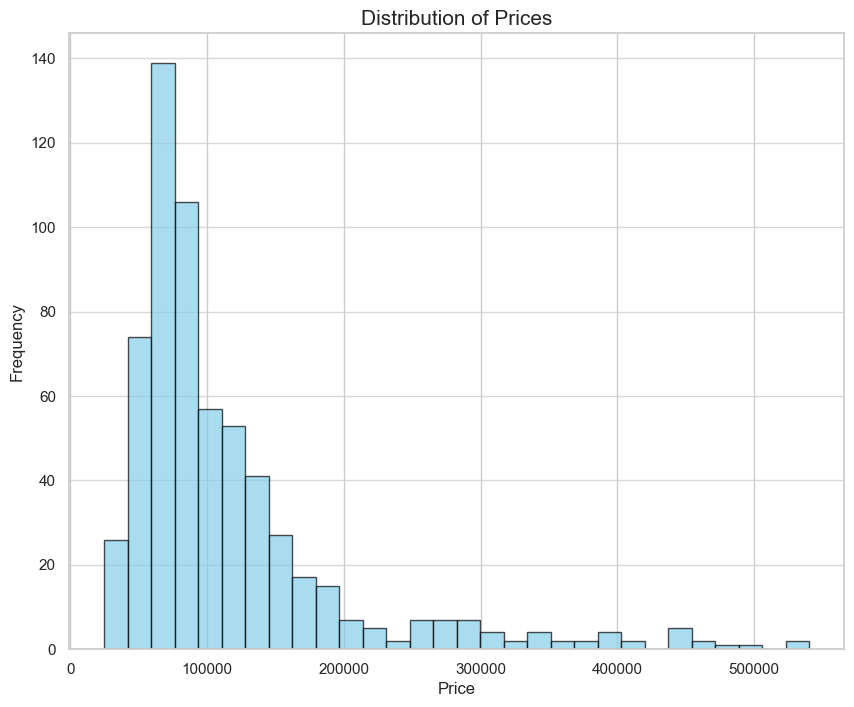

In [377]:
# Create a histogram with a color map, gridlines, and adjusted transparency
plt.figure(figsize=(10, 8))
plt.hist(df['Price'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

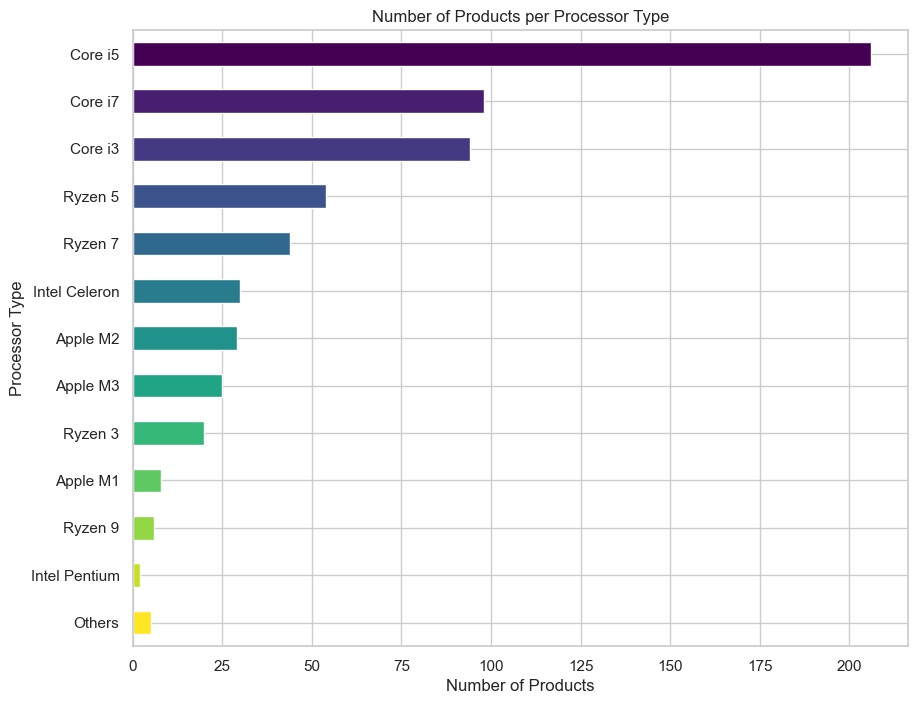

In [378]:
# Count the number of products for each processor type
processor_counts = df['Processor Type'].value_counts()

# Select the top 12 processor types
top_processors = processor_counts[:12]

# Group the rest into an "Others" category
if len(processor_counts) > 12:
    top_processors.loc['Others'] = processor_counts[12:].sum()

# Create a horizontal bar plot with a color map
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_processors)))
top_processors.plot(kind='barh', color=colors)
plt.title('Number of Products per Processor Type')
plt.xlabel('Number of Products')
plt.ylabel('Processor Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the processor type with the most products at the top
plt.show()

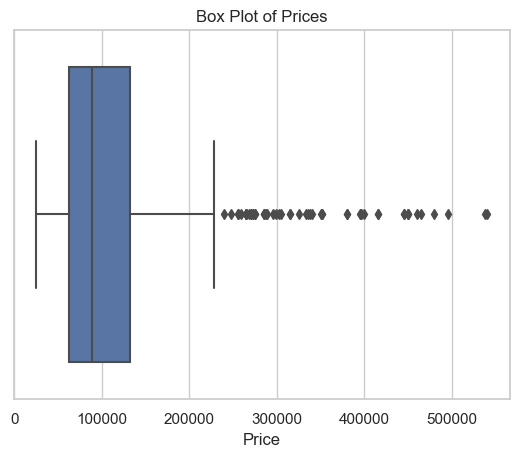

In [379]:
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Prices')
plt.show()

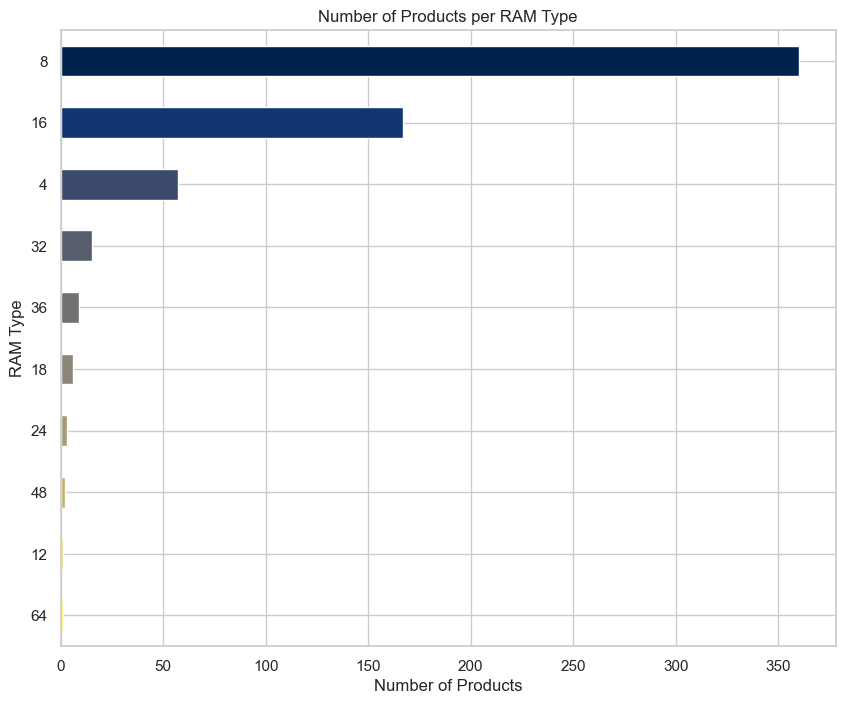

In [380]:
# Count the number of products for each RAM type
ram_counts = df['RAM'].value_counts()

# Select the top 12 RAM types
top_ram = ram_counts[:12]

# Group the rest into an "Others" category
if len(ram_counts) > 12:
    top_ram.loc['Others'] = ram_counts[12:].sum()

# Create a horizontal bar plot with a different color map
plt.figure(figsize=(10, 8))
colors = plt.cm.cividis(np.linspace(0, 1, len(top_ram)))
top_ram.plot(kind='barh', color=colors)
plt.title('Number of Products per RAM Type')
plt.xlabel('Number of Products')
plt.ylabel('RAM Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the RAM type with the most products at the top
plt.show()


**Let's clean up the "RAM" column.**

In [381]:
df['RAM'] = df['RAM'].str.split('GB').str[0]

In [382]:
df.head()

,Product Name,Processor Type,RAM,Storage,Display,Price,Brand
0,"Lenovo IdeaPad D330 10IGL Celeron N4020 10.1"" ...",Intel Celeron,4,128GB eMMC SSD,10.1,34500,Lenovo
1,"Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 14"" FHD La...",Ryzen 5,8,256GB SSD,14.0,60500,Lenovo
2,"MSI Modern 14 C12M Core i3 12th Gen 14"" FHD La...",Core i3,8,512GB SSD,14.0,59999,MSI
3,Acer Extensa 14 EX214-53-543W Core i5 12th Gen...,Core i5,8,512GB SSD,14.0,79999,Acer
4,Apple MacBook Pro 14 inch M3 Chip Liquid Retin...,Apple M3,8,512GB SSD,14.2,228000,Apple


In [383]:
# Convert the "RAM" column to numeric format
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    621 non-null    object 
 1   Processor Type  621 non-null    object 
 2   RAM             621 non-null    int64  
 3   Storage         621 non-null    object 
 4   Display         589 non-null    float64
 5   Price           621 non-null    int64  
 6   Brand           621 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 34.1+ KB


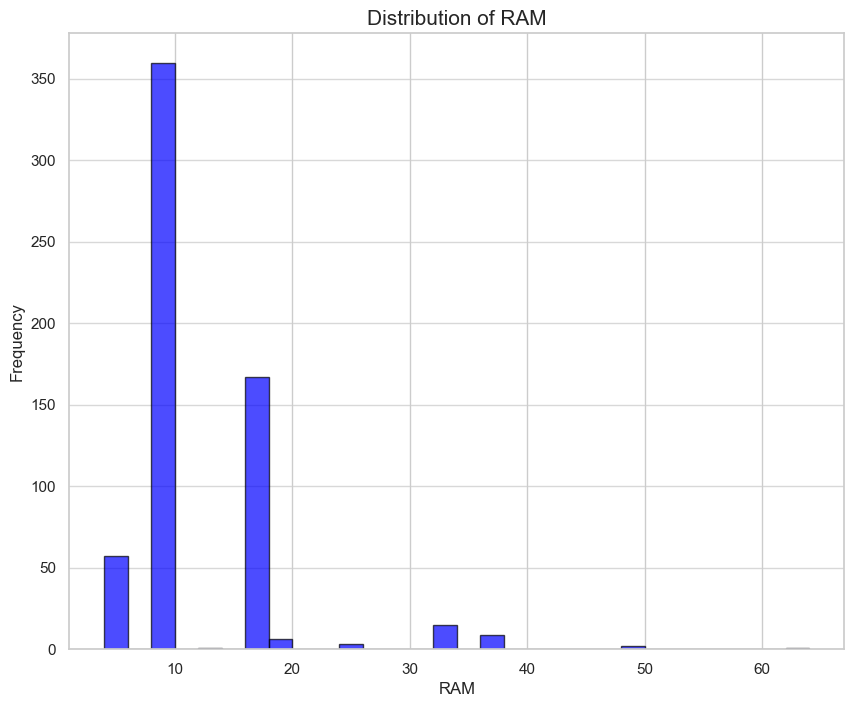

In [385]:
# Create a histogram with a color map, gridlines, and adjusted transparency
plt.figure(figsize=(10, 8))
plt.hist(df['RAM'], bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.title('Distribution of RAM', fontsize=15)
plt.xlabel('RAM', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

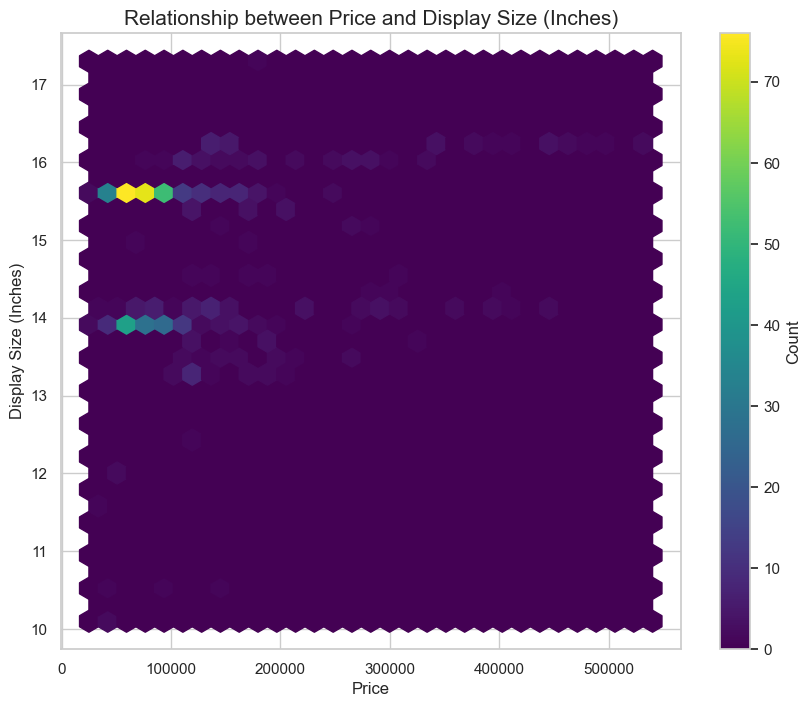

In [386]:
# Create a hexbin plot with a color bar
plt.figure(figsize=(10, 8))
plt.hexbin(x=df['Price'], y=df['Display'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count')

plt.title('Relationship between Price and Display Size (Inches)', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Display Size (Inches)', fontsize=12)
plt.show()


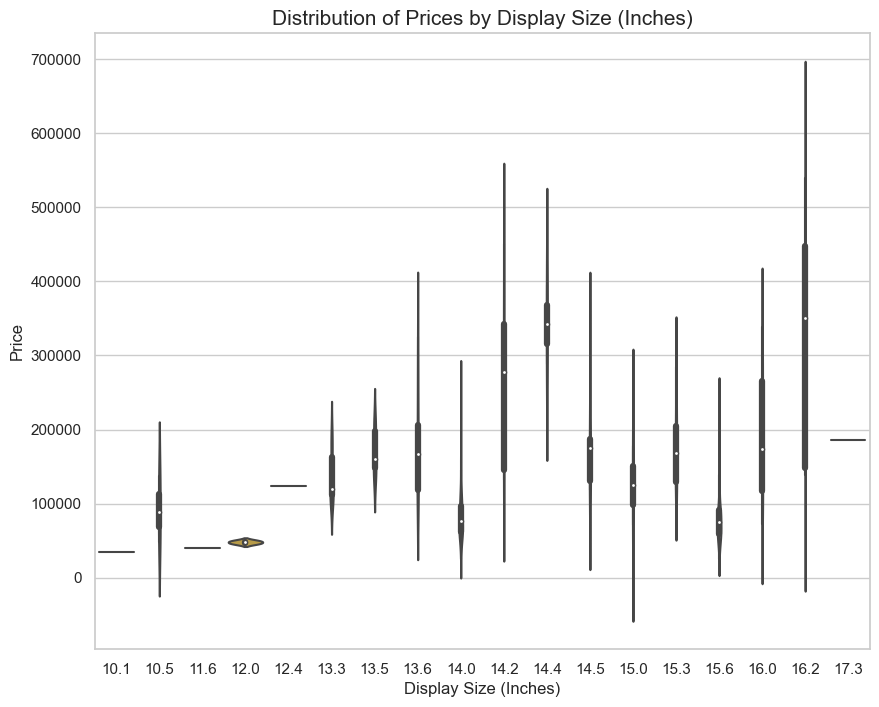

In [387]:
# Create a violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x=df['Display'], y=df['Price'])
plt.title('Distribution of Prices by Display Size (Inches)', fontsize=15)
plt.xlabel('Display Size (Inches)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

**Neither the Hexbin plot or the Violin plot works well for the dataset.**

**The width of the violins at any given y-value represents the density of data at that y-value, with wider sections representing higher density (more data points). Violin plots are best suited for larger datasets.**

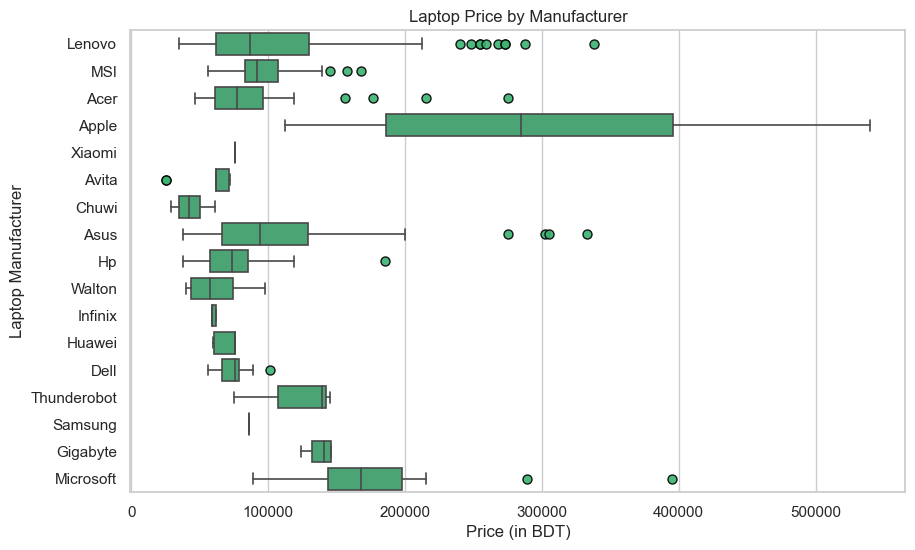

In [388]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the boxplot
ax = sns.boxplot(data=df, x="Price", y="Brand", color="mediumseagreen", linewidth=1.2,
                 flierprops=dict(marker='o', markeredgecolor='black', markersize=6.5,
                                 linestyle='none', markerfacecolor="mediumseagreen", alpha=0.9))

# Customize the plot
plt.xlabel("Price (in BDT)")
plt.ylabel("Laptop Manufacturer")
plt.title("Laptop Price by Manufacturer")

# Show the plot
plt.show()

**In the graph above, each brand has a box. 
Inside each box:**
- The line represents the median price for that brand.
- The box itself represents the interquartile range (IQR)—the middle 50% of prices.
- The whiskers extend from the box to the minimum and maximum prices within 1.5 times the IQR.
- Outliers (individual data points) are shown as circles beyond the whiskers.

**Apple has a notably higher median price and a wider IQR than other brands. Even its lowest price is higher than most other brands’ highest prices.**

**Lenovo, MSI, and Acer show wider distributions of prices, indicating they offer laptops across a range of costs.**

**Chuwi and Infinix have smaller IQRs, suggesting less variability in their laptop pricing.**

**Brands like Lenovo, MSI, and Acer have outliers where certain models are priced significantly higher than their typical range.**

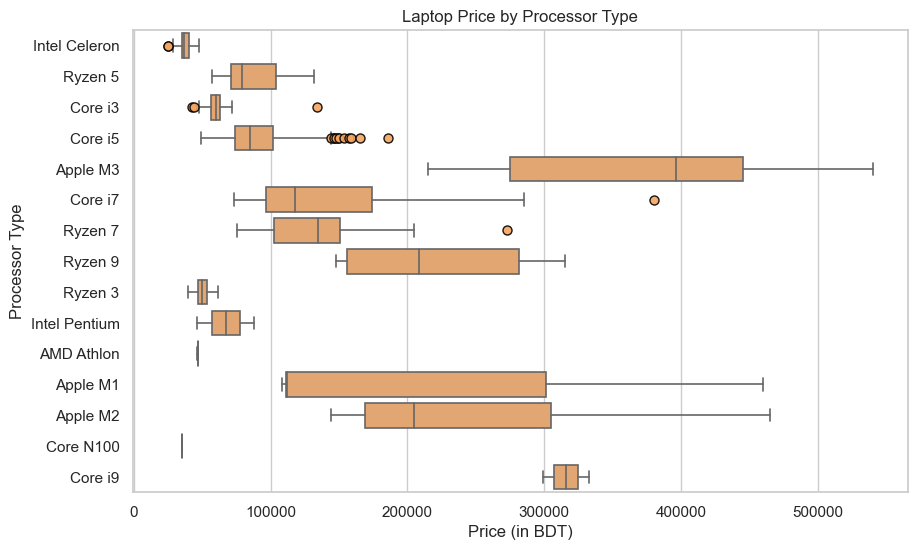

In [389]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the boxplot
ax = sns.boxplot(data=df, x="Price", y="Processor Type", color="sandybrown", linewidth=1.2,
                 flierprops=dict(marker='o', markeredgecolor='black', markersize=6.5,
                                 linestyle='none', markerfacecolor="sandybrown", alpha=0.9))

# Customize the plot
plt.xlabel("Price (in BDT)")
plt.ylabel("Processor Type")
plt.title("Laptop Price by Processor Type")

# Show the plot
plt.show()

**This horizontal box plot graph illustrates the distribution of laptop prices based on different processor types.**
- Some processors, like Core i5, have several outliers, indicating significant variability in laptop prices.
- Processors like Apple M1 and Ryzen 9 have wider IQRs, suggesting diverse price ranges for laptops with those processors.

**Overall, this graph provides insights into how laptop prices vary based on different processor types. It highlights the diversity in pricing across various processors.**

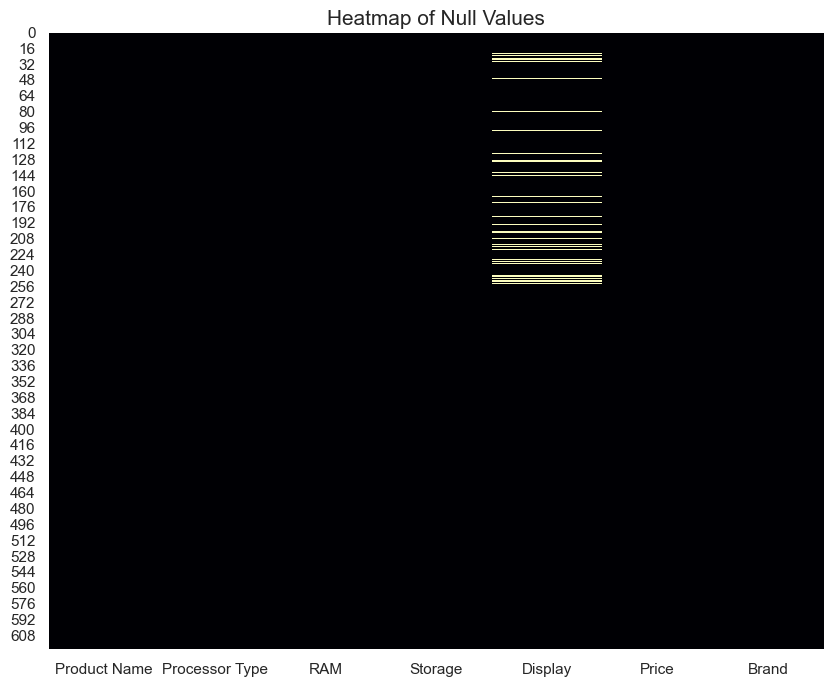

In [390]:
# Create a heatmap of null values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Heatmap of Null Values', fontsize=15)
plt.show()

**In the heatmap above, the beige color represents null values and the black color represents non-null values.**

array([[<AxesSubplot:title={'center':'RAM'}>,
        <AxesSubplot:title={'center':'Display'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

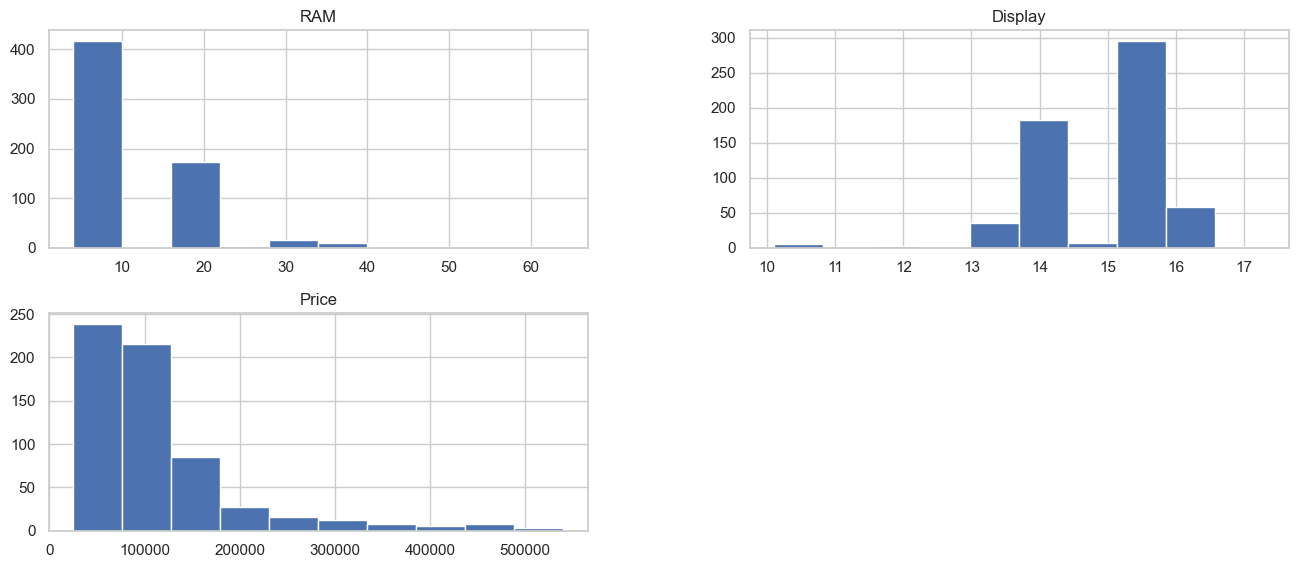

In [391]:
df.hist(figsize=(16,6.5))

In [392]:
# Calculate the median of the "Display" column
display_median = df['Display'].median()

# Replace null values in the "Display" column with the median
df['Display'].fillna(display_median, inplace=True)

In [393]:
cat_Cols =  ['Product Name','Processor Type','Storage', 'Brand']

In [394]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df, columns=cat_Cols, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (621, 701)


In [395]:
#Label encoding
en = LabelEncoder()
for cols in cat_Cols:
    df[cols] = en.fit_transform(df[cols])
print('Dataframe encoded by Label encoding dimension : ', df.shape)

Dataframe encoded by Label encoding dimension :  (621, 7)


In [396]:
df.head()

,Product Name,Processor Type,RAM,Storage,Display,Price,Brand
0,422,9,4,1,10.1,34500,10
1,407,12,8,11,14.0,60500,10
2,569,5,8,34,14.0,59999,11
3,88,6,8,34,14.0,79999,0
4,159,3,8,34,14.2,228000,1


In [397]:
# Select features and target
X = df.drop('Price', axis=1)
y = df['Price']

In [398]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Root Mean Squared Error: {rmse:.2f}')
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


Root Mean Squared Error: 55068.21
R2 score 0.6289517167119738
MAE 39199.991377878614


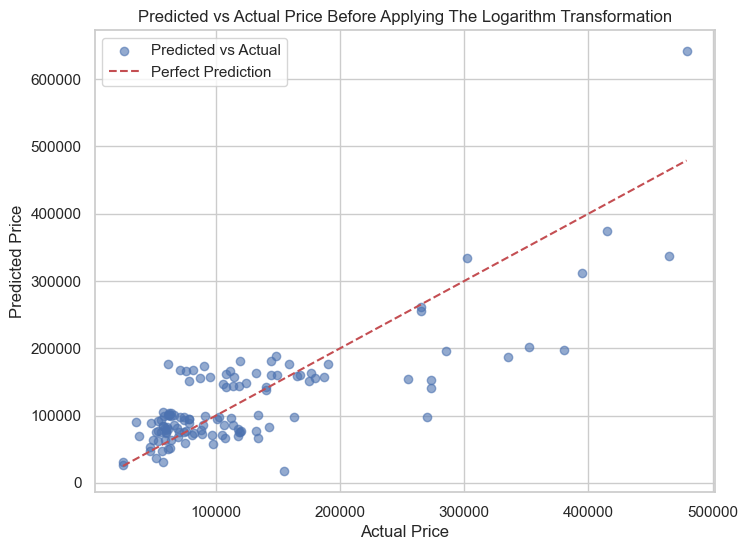

In [399]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price Before Applying The Logarithm Transformation')
plt.legend()
plt.grid(True)
plt.show()


In [400]:
# Select features and target
X = df.drop('Price', axis=1)
y = np.log(df['Price'])

In [401]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Root Mean Squared Error: {rmse:.2f}')
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


Root Mean Squared Error: 0.42
R2 score 0.5121980722582546
MAE 0.3258139347499821


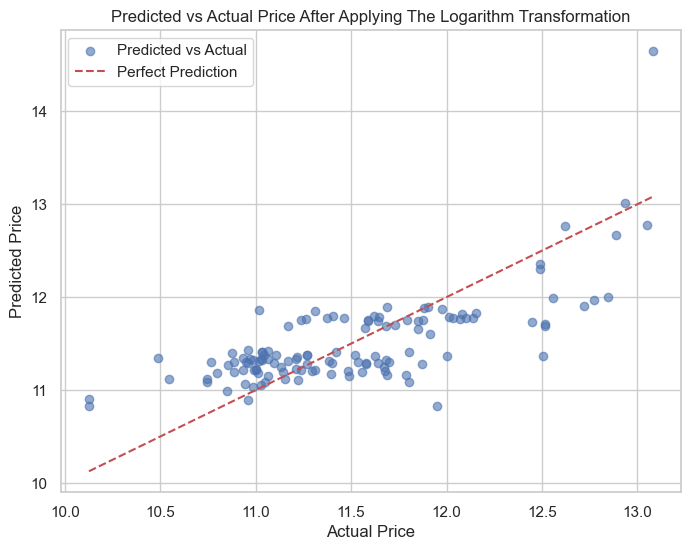

In [402]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price After Applying The Logarithm Transformation')
plt.legend()
plt.grid(True)
plt.show()

In [403]:
# Create a Random Forest model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')
print(f'MAE: {mae:.2f}')

Root Mean Squared Error: 0.23
R2 score: 0.86
MAE: 0.17


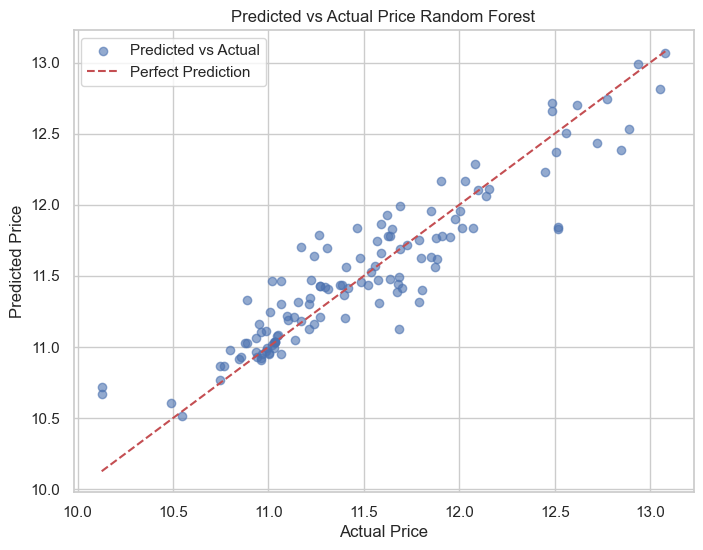

In [404]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price Random Forest')
plt.legend()
plt.grid(True)
plt.show()

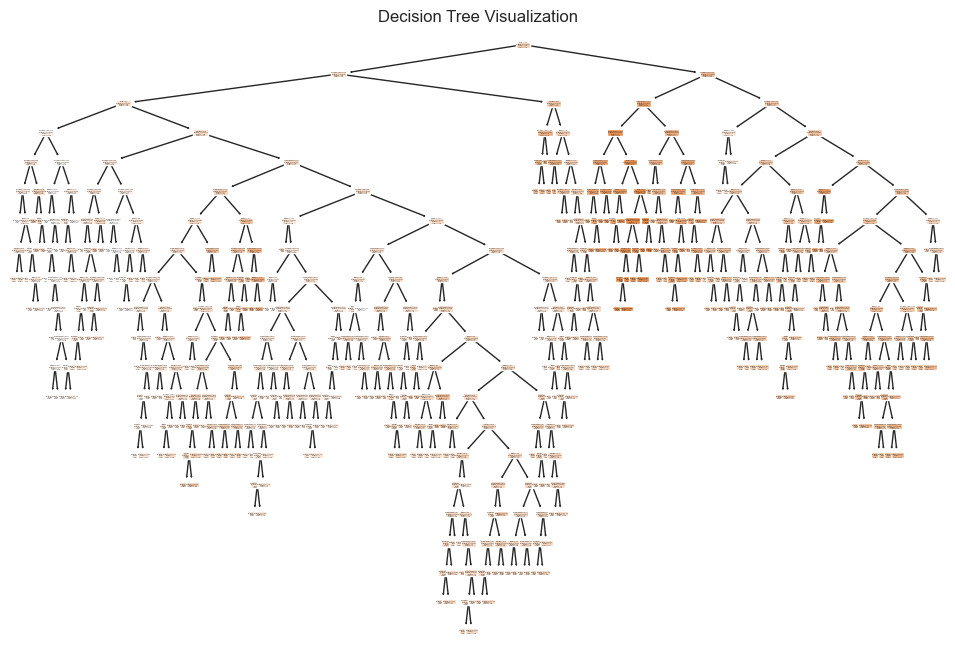

In [405]:
# Plot the first decision tree in the forest
plt.figure(figsize=(12, 8))
plot_tree(model1.estimators_[0], filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()